In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv("ApartmentRentPrediction.csv")

In [3]:
df = data.copy()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9000 non-null   int64  
 1   category       9000 non-null   object 
 2   title          9000 non-null   object 
 3   body           9000 non-null   object 
 4   amenities      5815 non-null   object 
 5   bathrooms      8970 non-null   float64
 6   bedrooms       8993 non-null   float64
 7   currency       9000 non-null   object 
 8   fee            9000 non-null   object 
 9   has_photo      9000 non-null   object 
 10  pets_allowed   5249 non-null   object 
 11  price          9000 non-null   int64  
 12  price_display  9000 non-null   object 
 13  price_type     9000 non-null   object 
 14  square_feet    9000 non-null   int64  
 15  address        6029 non-null   object 
 16  cityname       8934 non-null   object 
 17  state          8934 non-null   object 
 18  latitude

In [5]:
#columns with  more than 5000 distinct values should be removed or preprocessed to include less range 
object_columns_bt5_lt30=[]
object_columns_lt5=[]
for i  in data.columns:
    print(i)
    print( data[i].value_counts().shape)
    if(data[i].value_counts().shape[0]<=5 and type(data[i][0]) == str ):
        object_columns_lt5.append(i)
    elif(data[i].value_counts().shape[0]<=30 and data[i].value_counts().shape[0]>5 and type(data[i][0]) == str ):
        object_columns_bt5_lt30.append(i)

id
(9000,)
category
(3,)
title
(8441,)
body
(8969,)
amenities
(2093,)
bathrooms
(14,)
bedrooms
(10,)
currency
(1,)
fee
(1,)
has_photo
(3,)
pets_allowed
(3,)
price
(1646,)
price_display
(1647,)
price_type
(3,)
square_feet
(1682,)
address
(6016,)
cityname
(1497,)
state
(50,)
latitude
(2257,)
longitude
(2254,)
source
(11,)
time
(5886,)


In [6]:
object_columns_lt5

['category', 'currency', 'fee', 'has_photo', 'pets_allowed', 'price_type']

In [7]:
data.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,9.000000e+03,8970.000000,8993.000000,9000.000000,9000.000000,8993.00000,8993.000000,9.000000e+03
mean,5.623668e+09,1.380769,1.744023,1487.286222,947.138667,37.67689,-94.778612,1.574906e+09
std,7.007402e+07,0.616171,0.942446,1088.561190,668.806214,5.51527,15.769232,3.755142e+06
min,5.508654e+09,1.000000,0.000000,200.000000,106.000000,21.31550,-158.022100,1.568744e+09
25%,5.509250e+09,1.000000,1.000000,950.000000,650.000000,33.66200,-101.858700,1.568781e+09
50%,5.668610e+09,1.000000,2.000000,1275.000000,802.000000,38.75550,-93.707700,1.577358e+09
75%,5.668626e+09,2.000000,2.000000,1695.000000,1100.000000,41.34980,-82.446800,1.577359e+09
max,5.668663e+09,8.500000,9.000000,52500.000000,40000.000000,61.59400,-70.191600,1.577362e+09


In [8]:
data.head(5)

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5508832632,housing/rent/apartment,"Two BR - $1,194/mo - Apartment - come and see ...","Come experience. in Cary, NC offering recently...","Clubhouse,Fireplace,Gym,Patio/Deck,Playground,...",2.5,2.0,USD,No,Thumbnail,...,"$1,194",Monthly,800,NaN,Cary,NC,35.7585,-78.7783,RentDigs.com,1568755960
1,5664576849,housing/rent/apartment,One BR 640 West Wilson Street,This unit is located at 640 West Wilson Street...,"Cable or Satellite,Dishwasher,Elevator,Garbage...",1.0,1.0,USD,No,Thumbnail,...,"$1,370",Monthly,795,640 West Wilson St,Madison,WI,43.0724,-89.4003,RentLingo,1577015508
2,5668619365,housing/rent/apartment,One BR 2777 Sw Archer Rd,"This unit is located at 2777 Sw Archer Rd, Gai...","Basketball,Cable or Satellite,Dishwasher,Inter...",1.0,1.0,USD,No,Thumbnail,...,"$1,009",Monthly,560,2777 SW Archer Road,Gainesville,FL,29.6533,-82.3656,RentLingo,1577358921
3,5668632604,housing/rent/apartment,One BR 534-542 Park Avenue,"This unit is located at 534-542 Park Avenue, O...",NaN,1.0,1.0,USD,No,Thumbnail,...,$695,Monthly,600,534-542 Park Ave,Omaha,NE,41.2562,-96.0404,RentLingo,1577359849
4,5668637441,housing/rent/apartment,Three BR 2216 S Palm Grove Ave,"This unit is located at 2216 S Palm Grove Ave,...",NaN,3.0,3.0,USD,No,Thumbnail,...,"$3,695",Monthly,1600,2216 S Palm Grove Avenue,Los Angeles,CA,34.0372,-118.2972,RentLingo,1577360159


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9000 non-null   int64  
 1   category       9000 non-null   object 
 2   title          9000 non-null   object 
 3   body           9000 non-null   object 
 4   amenities      5815 non-null   object 
 5   bathrooms      8970 non-null   float64
 6   bedrooms       8993 non-null   float64
 7   currency       9000 non-null   object 
 8   fee            9000 non-null   object 
 9   has_photo      9000 non-null   object 
 10  pets_allowed   5249 non-null   object 
 11  price          9000 non-null   int64  
 12  price_display  9000 non-null   object 
 13  price_type     9000 non-null   object 
 14  square_feet    9000 non-null   int64  
 15  address        6029 non-null   object 
 16  cityname       8934 non-null   object 
 17  state          8934 non-null   object 
 18  latitude

In [10]:
object_columns_lt5

['category', 'currency', 'fee', 'has_photo', 'pets_allowed', 'price_type']

## Null values

In [11]:
df.isna().sum()

id                  0
category            0
title               0
body                0
amenities        3185
bathrooms          30
bedrooms            7
currency            0
fee                 0
has_photo           0
pets_allowed     3751
price               0
price_display       0
price_type          0
square_feet         0
address          2971
cityname           66
state              66
latitude            7
longitude           7
source              0
time                0
dtype: int64

In [12]:
object_columns_na = ("amenities","pets_allowed","address","cityname","state","price_type")

In [13]:
for i in object_columns_na:
    print("=================================")
    print(i)
    print(df[i].value_counts())

amenities
Parking                                                                                                         212
Dishwasher,Refrigerator                                                                                         200
Pool                                                                                                            148
Dishwasher,Parking,Pool                                                                                         134
Dishwasher                                                                                                      133
                                                                                                               ... 
Dishwasher,Garbage Disposal,Gated,Hot Tub,Parking,Patio/Deck,Pool,Refrigerator,Storage                            1
Cable or Satellite,Dishwasher,Fireplace,Internet Access,Parking,Patio/Deck,Pool,Refrigerator,Storage              1
AC,Basketball,Cable or Satellite,Dishwasher,Gym,Parking,Patio/

In [14]:
#unknown city can be predicted from state but now for simplicity will be replaced with mode 

from statistics import mode
df["amenities"].fillna("Parking", inplace=True)
df["pets_allowed"].fillna(mode(df["pets_allowed"]), inplace=True)
df["cityname"].fillna(mode(df["cityname"]), inplace=True)
df["state"].fillna(mode(df["state"]), inplace=True)


In [15]:
import re
def extract_road_name(address):
    
    pattern = r'\d*\s+([\w\s]+)\s+\w+$'
    match = re.search(pattern, address)
    
    if match:
        road_name = match.group(1)
        return road_name
    else:
        
        return None

In [16]:
df["address"] = df["address"].apply(lambda x: extract_road_name(x) if pd.notnull(x) else x)

In [17]:
df["address"].fillna(method='ffill', inplace=True)


In [18]:
df["address"].value_counts()

E                 89
W                 69
S                 53
N                 52
West              40
                  ..
N Blair            1
Briarthorne        1
River Crossing     1
Wickslow           1
Zelzah             1
Name: address, Length: 4304, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9000 non-null   int64  
 1   category       9000 non-null   object 
 2   title          9000 non-null   object 
 3   body           9000 non-null   object 
 4   amenities      9000 non-null   object 
 5   bathrooms      8970 non-null   float64
 6   bedrooms       8993 non-null   float64
 7   currency       9000 non-null   object 
 8   fee            9000 non-null   object 
 9   has_photo      9000 non-null   object 
 10  pets_allowed   9000 non-null   object 
 11  price          9000 non-null   int64  
 12  price_display  9000 non-null   object 
 13  price_type     9000 non-null   object 
 14  square_feet    9000 non-null   int64  
 15  address        8999 non-null   object 
 16  cityname       9000 non-null   object 
 17  state          9000 non-null   object 
 18  latitude

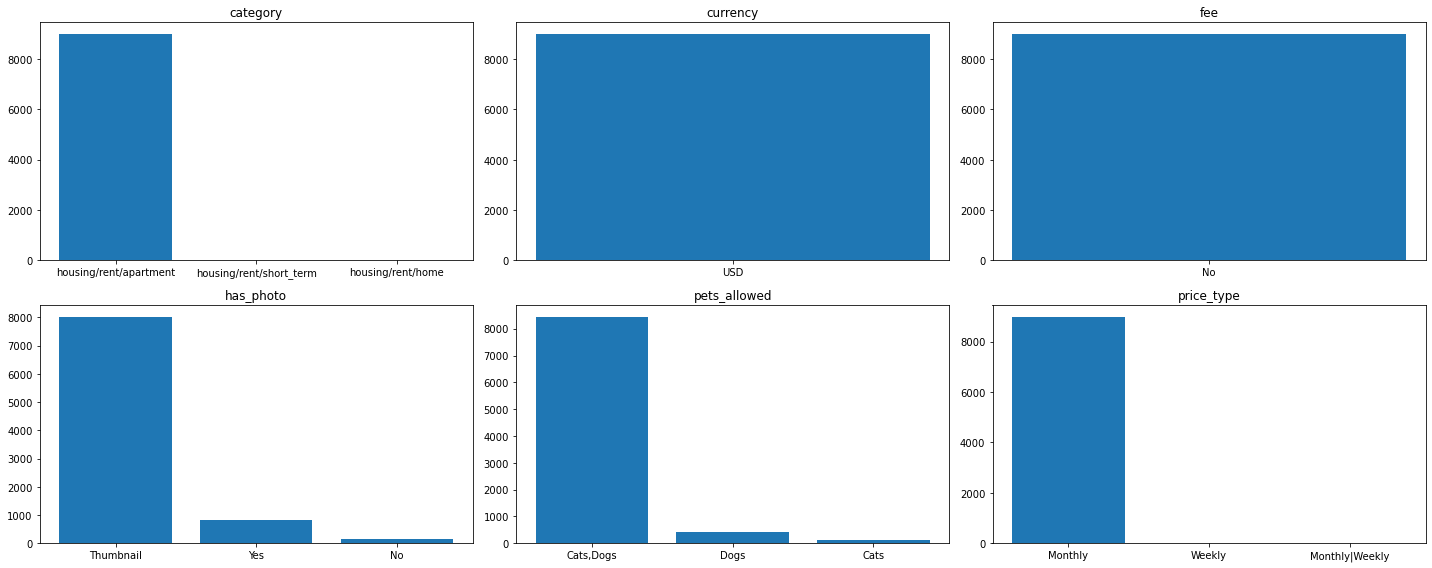

In [20]:

#plot columns having ditinct values less than 5 
num_rows = 2
num_cols = 3
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 8))

axs = axs.flatten()
for i, column in enumerate(object_columns_lt5):
    row = i // num_cols
    col = i % num_cols
    axs[i].bar(df[column].unique(), df[column].value_counts())  # Plotting as a bar plot
    axs[i].set_title(column)
plt.tight_layout()
plt.show()


### fee,currency have one value should be dropped
### price type same has only one weekly and one monthly better drop it 
### may trying to combine Has_photos columns(thumbnail,yes) test on the model 


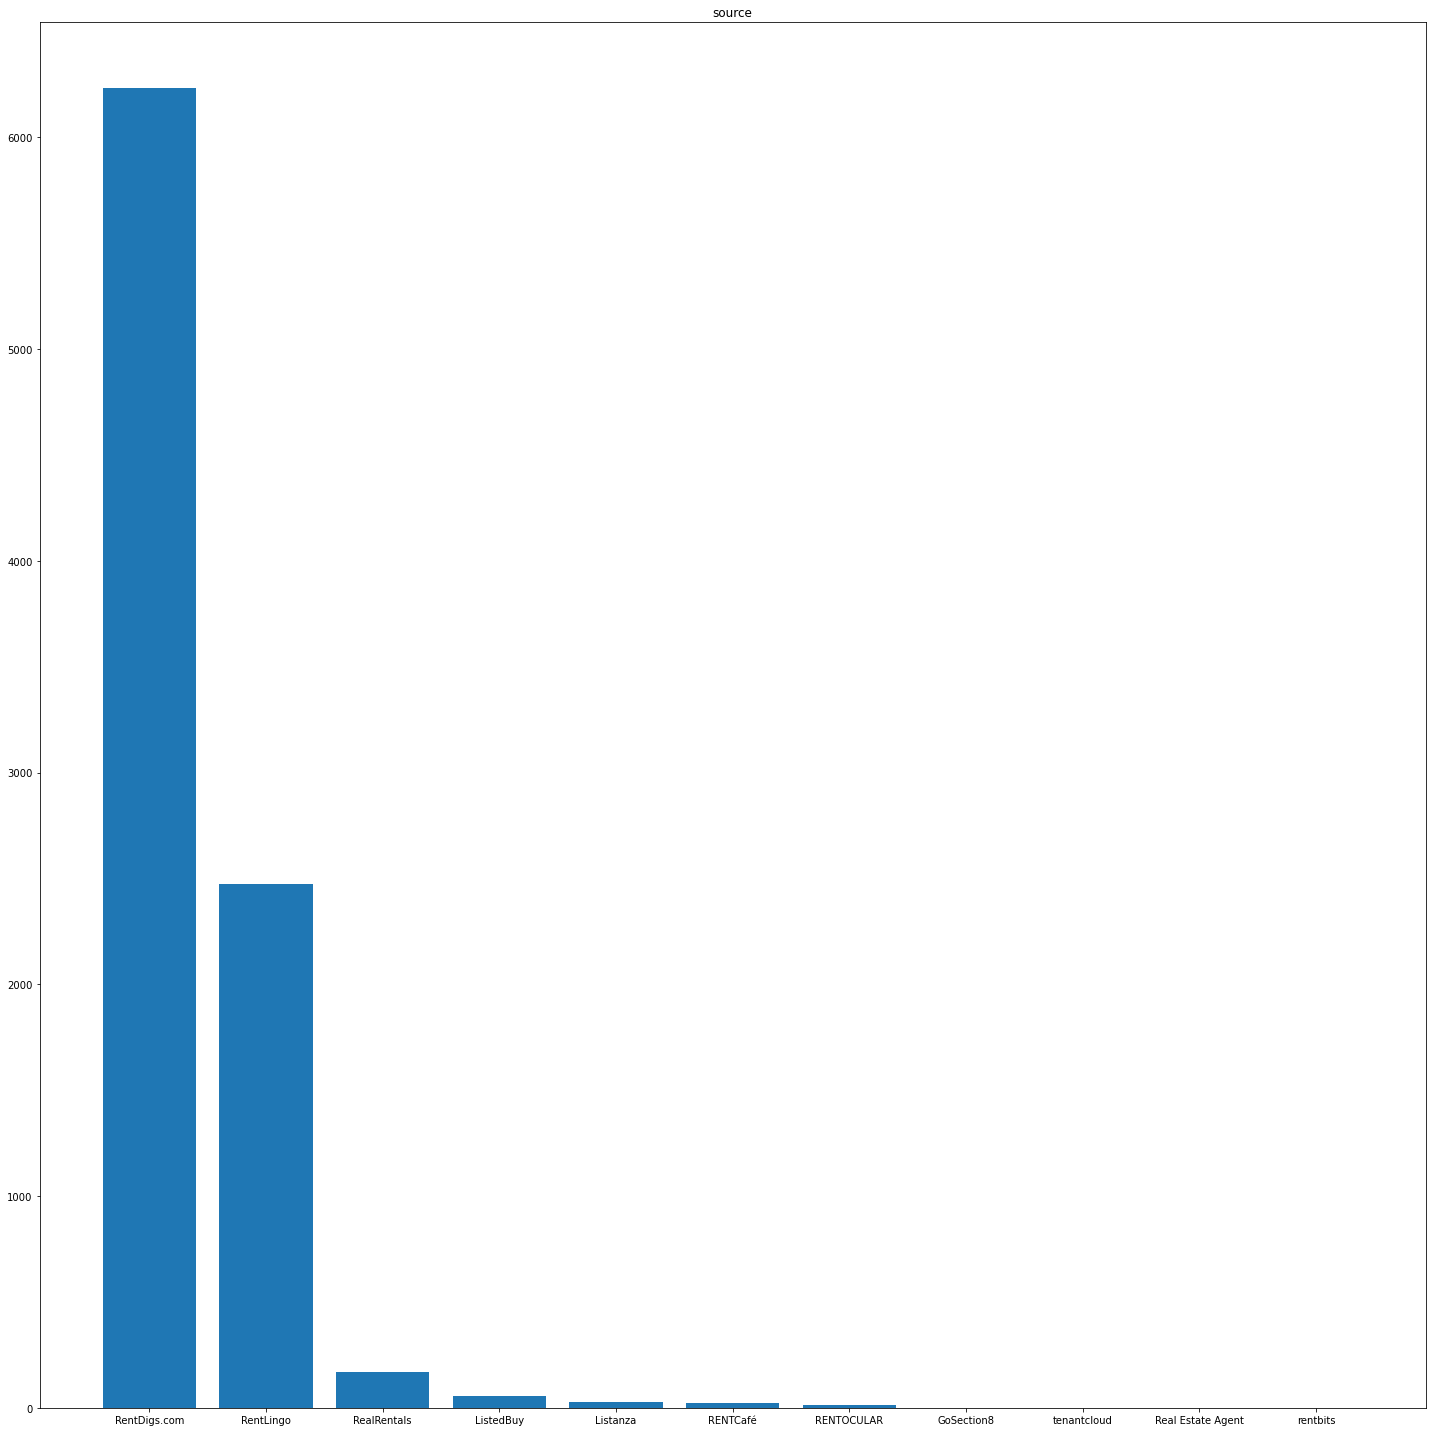

In [21]:
plt.figure(figsize=(20,20))
for column in object_columns_bt5_lt30:
    plt.bar(df[column].unique(), df[column].value_counts())  
    plt.title(column)
plt.tight_layout()
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9000 non-null   int64  
 1   category       9000 non-null   object 
 2   title          9000 non-null   object 
 3   body           9000 non-null   object 
 4   amenities      9000 non-null   object 
 5   bathrooms      8970 non-null   float64
 6   bedrooms       8993 non-null   float64
 7   currency       9000 non-null   object 
 8   fee            9000 non-null   object 
 9   has_photo      9000 non-null   object 
 10  pets_allowed   9000 non-null   object 
 11  price          9000 non-null   int64  
 12  price_display  9000 non-null   object 
 13  price_type     9000 non-null   object 
 14  square_feet    9000 non-null   int64  
 15  address        8999 non-null   object 
 16  cityname       9000 non-null   object 
 17  state          9000 non-null   object 
 18  latitude

In [23]:
df["price"].describe()

count     9000.000000
mean      1487.286222
std       1088.561190
min        200.000000
25%        950.000000
50%       1275.000000
75%       1695.000000
max      52500.000000
Name: price, dtype: float64

#### adding  a price category column to visulize the relation between category columns and the target column

In [24]:

bins = [0, 950.000000, 1695.000000 , float('inf')]
labels = ['Low', 'Mid', 'High']

df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)


In [25]:
df["price_category"].value_counts()

Mid     4469
High    2288
Low     2243
Name: price_category, dtype: int64

<AxesSubplot:xlabel='source'>

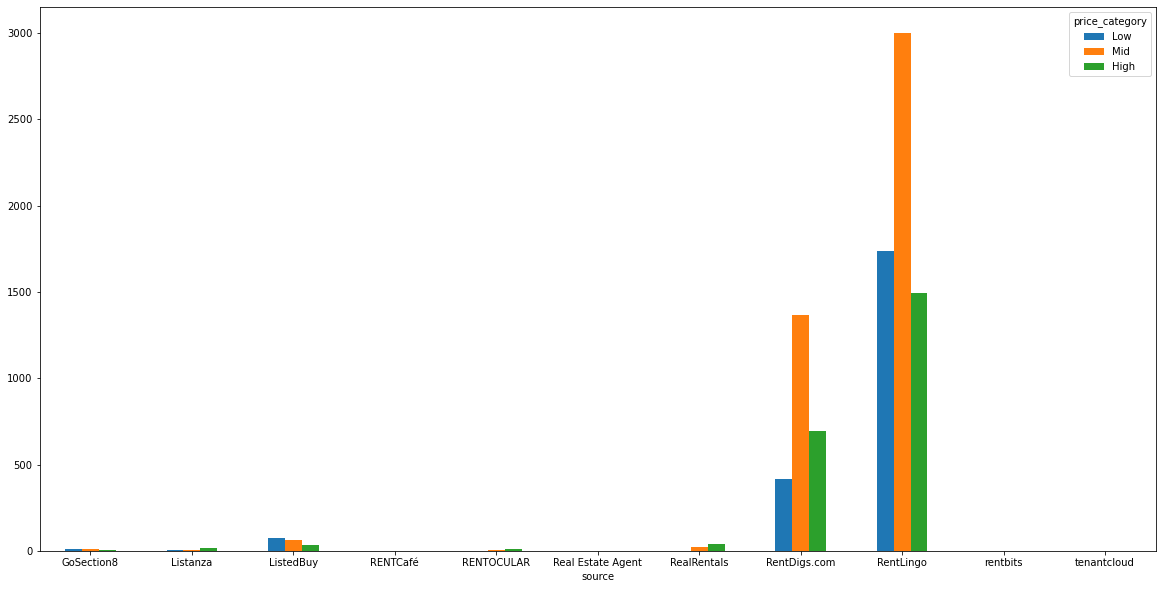

In [26]:

CrosstabResult=pd.crosstab(index=df["source"],columns=df['price_category'])
 
CrosstabResult.plot.bar(figsize=(20,10), rot=0)

##### renting from rentlingo privide  a chance of a low price digs is the opposite 

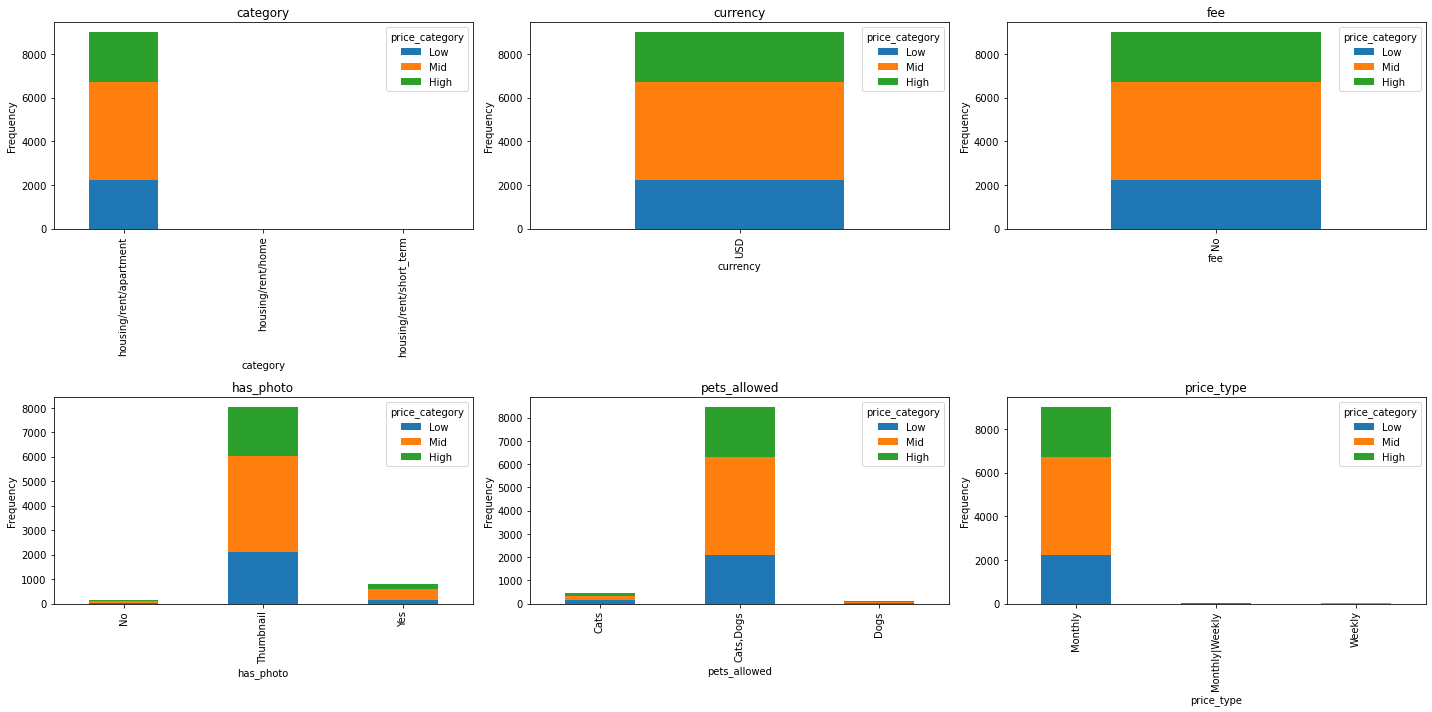

In [27]:

num_rows = 2
num_cols = 3
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 10))

axs = axs.flatten()
for i, column in enumerate(object_columns_lt5):
    row = i // num_cols
    col = i % num_cols
    CrosstabResult = pd.crosstab(index=df[column], columns=df['price_category'])
    CrosstabResult.plot(kind='bar', ax=axs[i], stacked=True)  # Plotting crosstab as a bar plot
    axs[i].set_title(column)
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


#### it doesn't seem we have a dominant feature here 

<AxesSubplot:xlabel='state'>

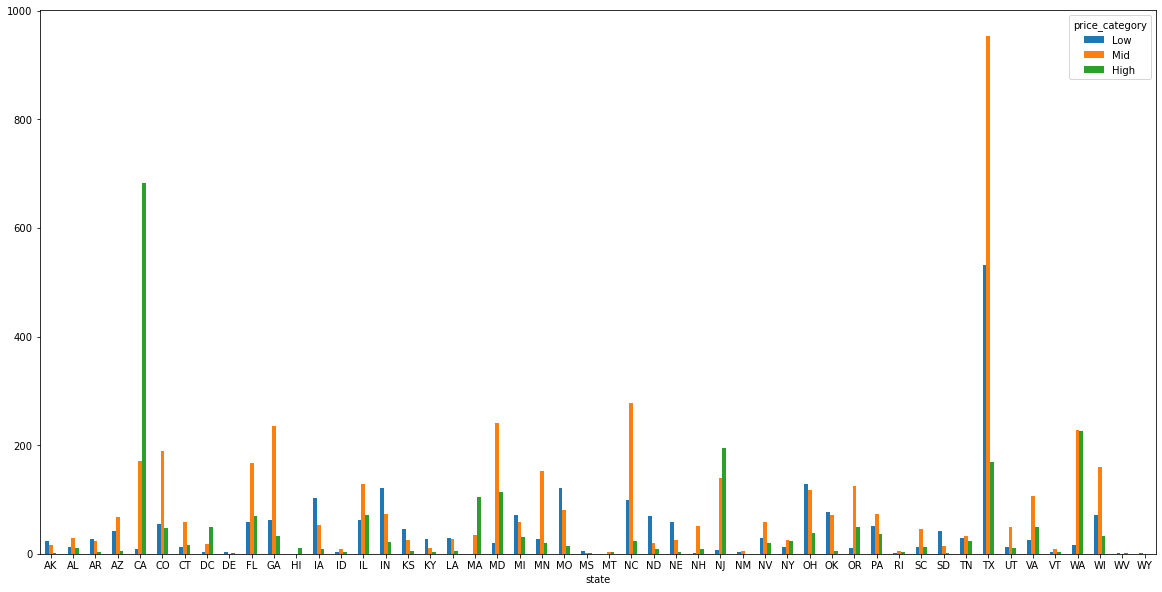

In [28]:

CrosstabResult=pd.crosstab(index=df["state"],columns=df['price_category'])
 
CrosstabResult.plot.bar(figsize=(20,10), rot=0)

#### most of the data divided betweeb  tx and ca may be adding city to state column generate a more diverse column 
#### being in Ca&NJ is a high price
#### being in IA&IN is a low price 

In [29]:
df["citypstate"]=df["cityname"]+df["state"]

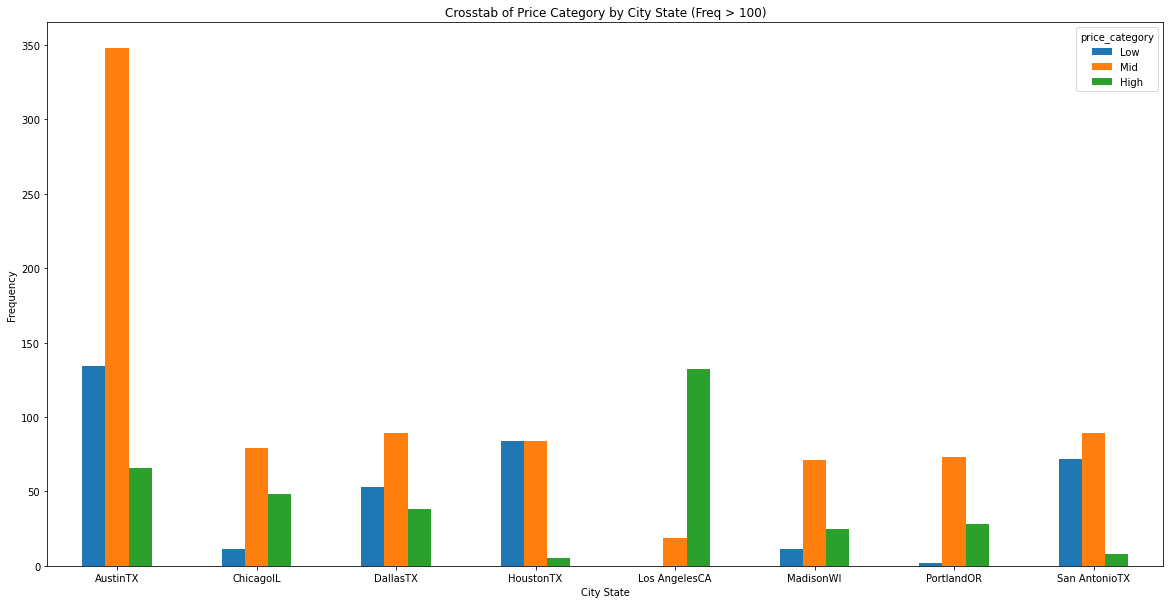

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

citystate_counts = df['citypstate'].value_counts()
filtered_citystates = citystate_counts[citystate_counts > 100].index
filtered_df = df[df['citypstate'].isin(filtered_citystates)]
CrosstabResult = pd.crosstab(index=filtered_df['citypstate'], columns=df['price_category'])
CrosstabResult.plot.bar(figsize=(20, 10), rot=0)
plt.title('Crosstab of Price Category by City State (Freq > 100)')
plt.xlabel('City State')
plt.ylabel('Frequency')
plt.show()


#### losAngles is the highest  houston tx is the lowest

In [31]:
df["citypstate"].value_counts()


AustinTX          548
DallasTX          180
HoustonTX         173
San AntonioTX     169
Los AngelesCA     151
                 ... 
WestchaseFL         1
O FallonMO          1
SanfordFL           1
CollingswoodNJ      1
CamasWA             1
Name: citypstate, Length: 1679, dtype: int64

### finding a good representation for title,body,amienetes



In [32]:
df["body_count"]=df["body"].apply(lambda x : len(str(x).replace(" ", "")))
df["title_count"]=df["title"].apply(lambda x : len(str(x).replace(" ", "")))


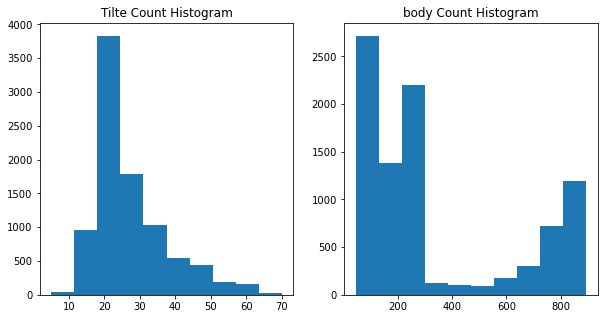

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.hist(df['title_count'])
ax1.set_title('Tilte Count Histogram')

ax2.hist(df['body_count'])
ax2.set_title('body Count Histogram')

plt.show()

#### dealing with the body_count it seems that the bins 300,650( note those are not a bins for a normal distibution)
#### dealing with the title_count it seems that the bins 18,48( note those are not a bins for a normal distibution)

In [34]:

bins1 = [0, 300, 750, float('inf')]
labels = ['sm', 'av', 'High']
bins2= [0, 18, 48, float('inf')]
body_count_category = pd.cut(df['body_count'], bins=bins1, labels=labels, right=False)
title_count_category = pd.cut(df['title_count'], bins=bins2, labels=labels, right=False)

In [35]:
title_count_category.value_counts()

av      7488
sm       990
High     522
Name: title_count, dtype: int64

<AxesSubplot:xlabel='title_count'>

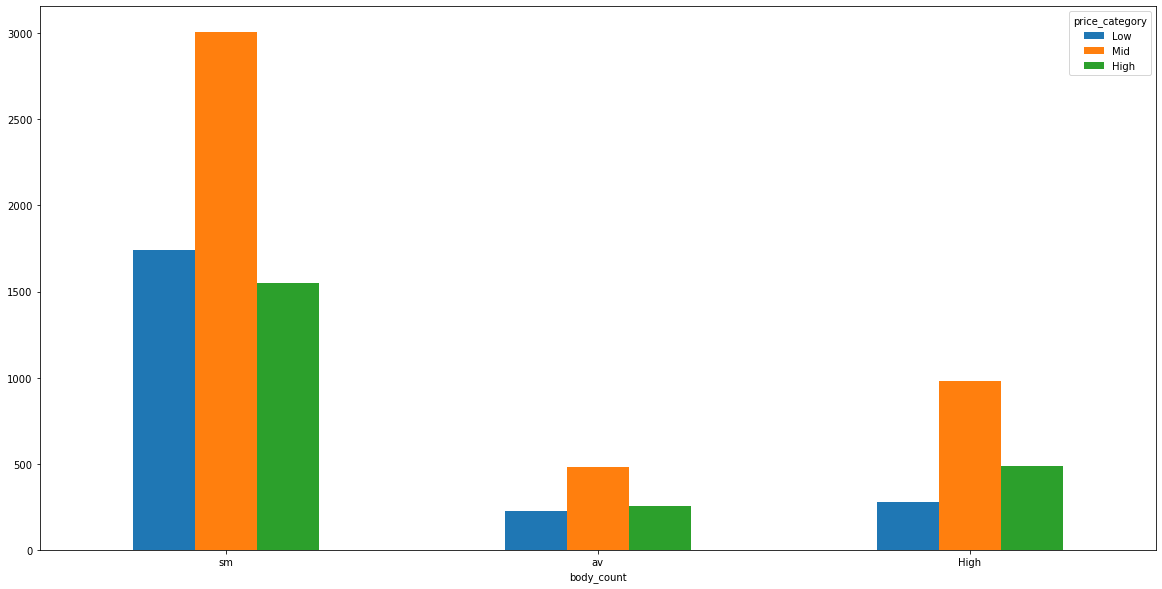

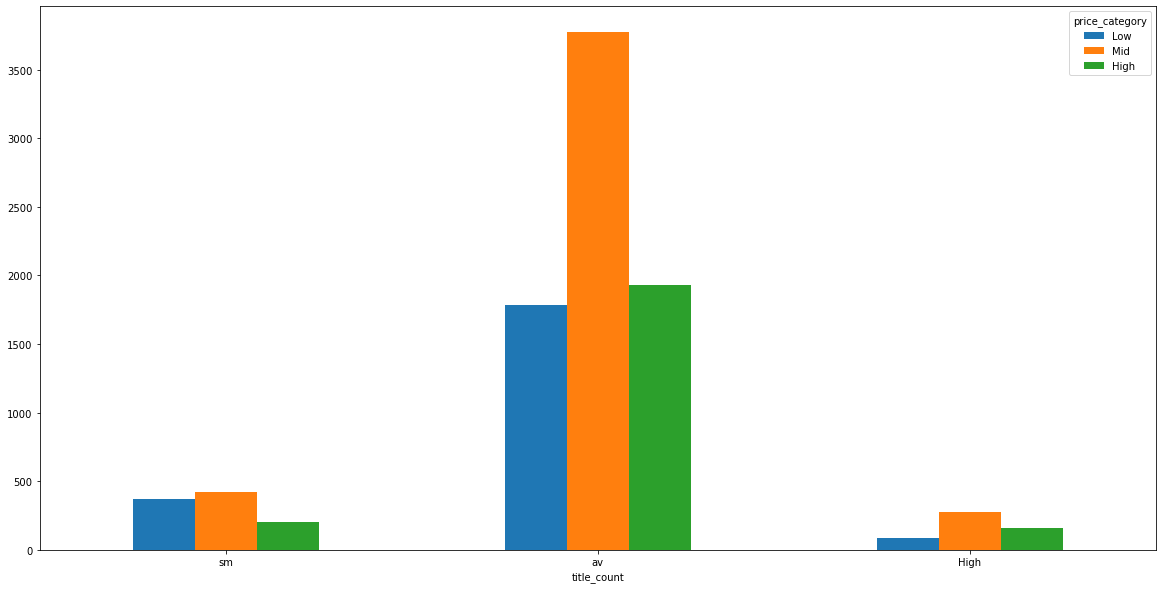

In [36]:

CrosstabResult=pd.crosstab(index=body_count_category,columns=df['price_category'])
 
CrosstabResult.plot.bar(figsize=(20,10), rot=0)

CrosstabResult=pd.crosstab(index=title_count_category,columns=df['price_category'])
 
CrosstabResult.plot.bar(figsize=(20,10), rot=0)

#### a bigger title means a chance of it being more expensive 
#### a smaller title  means a chance of it being less expensive
#### replacing title,body with title_count,body_count

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              9000 non-null   int64   
 1   category        9000 non-null   object  
 2   title           9000 non-null   object  
 3   body            9000 non-null   object  
 4   amenities       9000 non-null   object  
 5   bathrooms       8970 non-null   float64 
 6   bedrooms        8993 non-null   float64 
 7   currency        9000 non-null   object  
 8   fee             9000 non-null   object  
 9   has_photo       9000 non-null   object  
 10  pets_allowed    9000 non-null   object  
 11  price           9000 non-null   int64   
 12  price_display   9000 non-null   object  
 13  price_type      9000 non-null   object  
 14  square_feet     9000 non-null   int64   
 15  address         8999 non-null   object  
 16  cityname        9000 non-null   object  
 17  state         

In [38]:
df["address"].value_counts()

E                 89
W                 69
S                 53
N                 52
West              40
                  ..
N Blair            1
Briarthorne        1
River Crossing     1
Wickslow           1
Zelzah             1
Name: address, Length: 4304, dtype: int64

### replacing amenities with num of ocuurence of the most freq words 

In [39]:
from collections import Counter
words = ' '.join(df['amenities']).split(',')
word_counts = Counter(words)
top_15_words = [word for word, _ in word_counts.most_common(20)]

#### a higher number means more services

In [40]:
for i, row in df.iterrows():
    text = row['amenities']
    found = False  # Initialize found flag for each row
    a = 0
    for word in top_15_words:
        if word in text:
            found = True
            text = text.replace(word, str(top_15_words.index(word) + 1))
            a = a+1
    
    text  = str(a)
    if not found:
        text = str(0)
        
    df.at[i, 'amenities'] = text


In [41]:
df["amenities"].value_counts()

1     3964
3      982
2      879
4      747
5      543
6      453
7      352
8      305
9      252
10     220
11     157
12      56
13      37
0       35
14      16
16       2
Name: amenities, dtype: int64

<AxesSubplot:xlabel='amenities'>

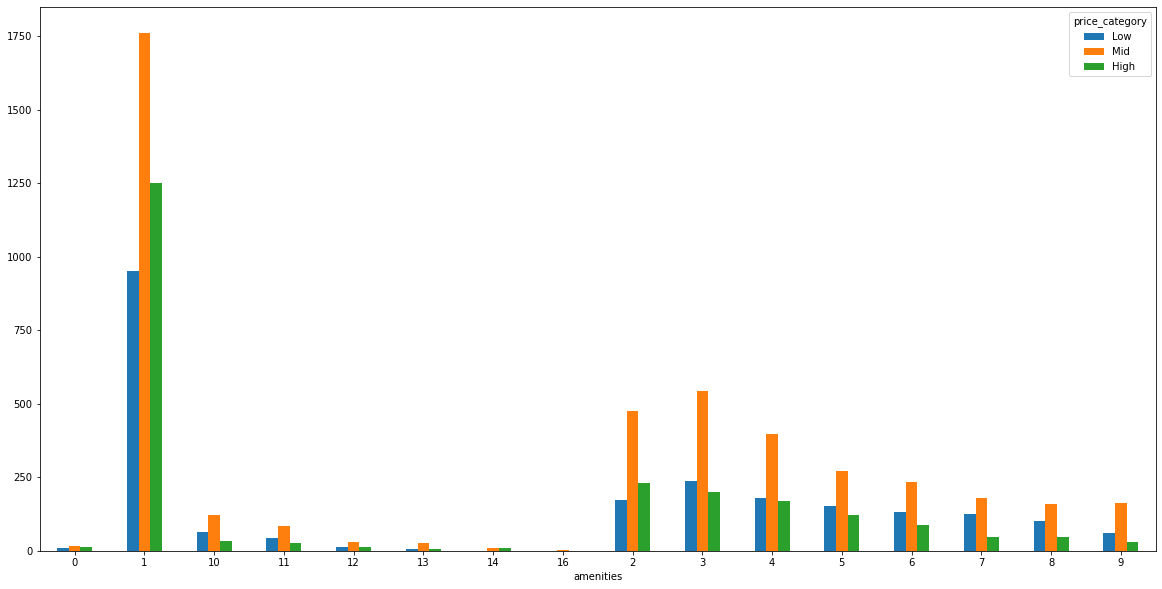

In [42]:
CrosstabResult=pd.crosstab(index=df["amenities"],columns=df['price_category'])
 
CrosstabResult.plot.bar(figsize=(20,10), rot=0)

In [43]:
a = df.groupby('cityname')['price']
a.get_group('Los Angeles').mean()


3084.543046357616

In [44]:
df['city_offer_what'] = df.groupby('cityname')['price'].transform(lambda x: 'high' if x.mean() > 2000 else ('avg' if x.mean() > 1400 else 'low'))

In [45]:
df['city_offer_what'].value_counts()

low     5408
avg     2299
high    1293
Name: city_offer_what, dtype: int64

In [46]:
df["price"].describe()

count     9000.000000
mean      1487.286222
std       1088.561190
min        200.000000
25%        950.000000
50%       1275.000000
75%       1695.000000
max      52500.000000
Name: price, dtype: float64

In [47]:
price_min = df['price'].min()
price_max = df['price'].max()
norm_p = (df['price'] - price_min) / (price_max - price_min)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

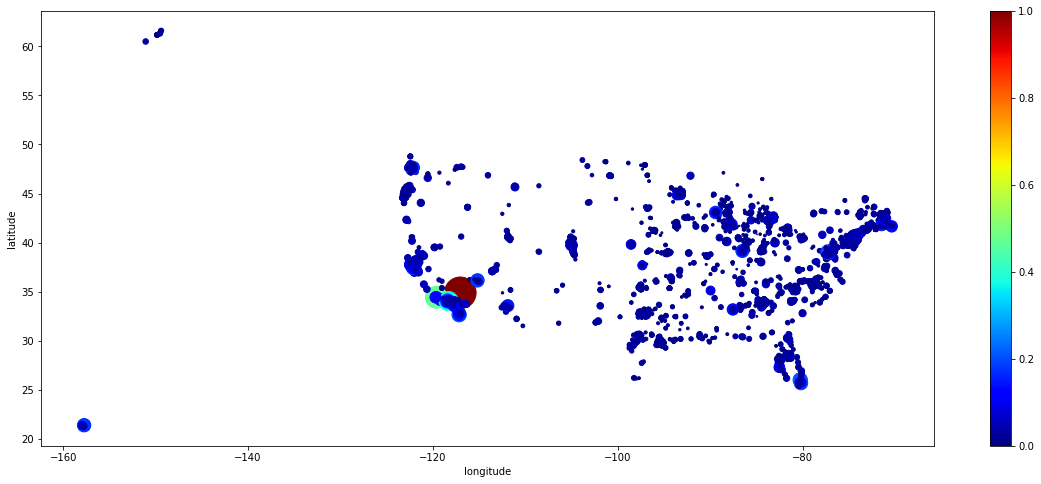

In [48]:
df.plot(kind = "scatter",x='longitude',y='latitude', s = norm_p*1000,cmap='jet',colorbar=True,c=norm_p
       ,figsize=(20,8),sharex=False)

### can we create a new column for this area longitude(-123,-114)  latitude(30,38)

In [49]:
def in_area(row):
    if (-123 <= row['longitude'] <= -114) and (30 <= row['latitude'] <= 38):
        return 1
    else:
        return 0

In [50]:
df['in_area'] = df.apply(in_area, axis=1)

####  at 35 , -120 the price increases in this area  dropping this column  will affect the model 

In [51]:
# trying to use latitude and longitude  
df.dropna(subset=["latitude", "longitude"], inplace=True)
# from math import radians, cos, sin, asin, sqrt
# 
# 
# def haversine(lon1, lat1, lon2, lat2):
#     """
#     Calculate the great circle distance in kilometers between two points 
#     on the earth (specified in decimal degrees)
#     """
#     # convert decimal degrees to radians 
#     lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
# 
#     # haversine formula 
#     dlon = lon2 - lon1 
#     dlat = lat2 - lat1 
#     a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
#     c = 2 * asin(sqrt(a)) 
#     r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
#     return c * r
# 
# austin_lat = 30.2695
# austin_long = -97.7159
# 
# # calculate distance 
# df["distance_from_austin"] = df.apply(lambda x: haversine(austin_long, austin_lat, x["longitude"], x["latitude"]), axis=1)
# 
# # drop latitude and longitude columns
# #df.drop(["latitude", "longitude"], axis=1, inplace=True)
# #plot distance_from_austin with price if cityname is austin
# plt.scatter(df["distance_from_austin"], df["price"], c=df["cityname"].apply(lambda x: 1 if x == "Austin" else 0), cmap="coolwarm" , s=10, alpha=0.5)
# plt.show()

# i think price is not related to distance from austin


0


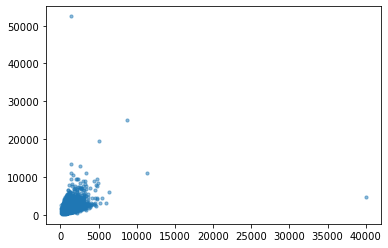

In [52]:
#square_feet column
print(df["square_feet"].isna().sum())#0
#plot square_feet with price
plt.scatter(df["square_feet"], df["price"], s=10, alpha=0.5)
plt.show()

### dealing with encoding 
#### category,currency,fee,price_type,address , source label_encoder 
#### has_photos ,pets_alloweed one_hot encoding
#### price_display should be float and then drop it
#### freq encoder  city , state ,citypstate
#### drop price category 

In [53]:
## columns to drop after encoding
columns_to_dop=['city_offer_what','category','source','pets_allowed','has_photo','cityname','state','citypstate','price_category','currency','fee','price_type','address','title','body']
#columns_to_dop=['category','source','citypstate','price_category','currency','fee','price_type','address','title','body']


In [54]:
df['has_photo'] = df['has_photo'].replace('Thumbnail','Yes')

In [55]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])
df['source_encoded'] = label_encoder.fit_transform(df['source'])
df['currency_encoded'] = label_encoder.fit_transform(df['currency'])
df['fee_encoded'] = label_encoder.fit_transform(df['fee'])
df['price_type_enc'] = label_encoder.fit_transform(df['price_type'])
df['address_encoded'] = label_encoder.fit_transform(df['address'])
df['city_encoded'] = label_encoder.fit_transform(df['cityname'])
df['state_encoded'] = label_encoder.fit_transform(df['state'])
df['pets_allowed_en'] = label_encoder.fit_transform(df['pets_allowed'])
df['has_photo_en'] = label_encoder.fit_transform(df['has_photo'])
df['city_offer_what_encoded'] = label_encoder.fit_transform(df['city_offer_what'])


In [56]:
#df = pd.get_dummies(df, columns=['has_photo', 'pets_allowed']) 
#df = pd.get_dummies(df, columns=['state']) 

In [57]:
#freq_encoder_city = df.groupby('cityname').size() / len(df)
#freq_encoder_state = df.groupby('state').size() / len(df)
#freq_encoder_city_state = df.groupby('citypstate').size() / len(df)

#df['city_freq_encoded'] = df['cityname'].map(freq_encoder_city)
#df['state_freq_encoded'] = df['state'].map(freq_encoder_state)
#df['city_state_freq_encoded'] = df['citypstate'].map(freq_encoder_city_state)

In [58]:
df.drop(columns=columns_to_dop,axis=1,inplace=True)

#### converting amenitites and price_display to int/float

In [59]:
df["amenities"]=df["amenities"].astype(int)
df['price_display'] = df['price_display'].str.replace(r'[^\d.]', '', regex=True).astype(float)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8993 entries, 0 to 8999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       8993 non-null   int64  
 1   amenities                8993 non-null   int32  
 2   bathrooms                8963 non-null   float64
 3   bedrooms                 8986 non-null   float64
 4   price                    8993 non-null   int64  
 5   price_display            8993 non-null   float64
 6   square_feet              8993 non-null   int64  
 7   latitude                 8993 non-null   float64
 8   longitude                8993 non-null   float64
 9   time                     8993 non-null   int64  
 10  body_count               8993 non-null   int64  
 11  title_count              8993 non-null   int64  
 12  in_area                  8993 non-null   int64  
 13  category_encoded         8993 non-null   int32  
 14  source_encoded          

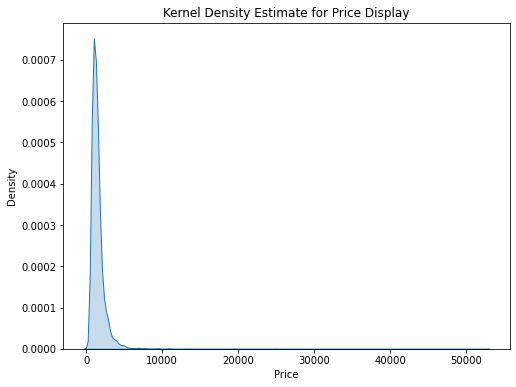

In [61]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df["price_display"], shade=True)
plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Kernel Density Estimate for Price Display")
plt.show()

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8993 entries, 0 to 8999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       8993 non-null   int64  
 1   amenities                8993 non-null   int32  
 2   bathrooms                8963 non-null   float64
 3   bedrooms                 8986 non-null   float64
 4   price                    8993 non-null   int64  
 5   price_display            8993 non-null   float64
 6   square_feet              8993 non-null   int64  
 7   latitude                 8993 non-null   float64
 8   longitude                8993 non-null   float64
 9   time                     8993 non-null   int64  
 10  body_count               8993 non-null   int64  
 11  title_count              8993 non-null   int64  
 12  in_area                  8993 non-null   int64  
 13  category_encoded         8993 non-null   int32  
 14  source_encoded          

In [63]:
# id column
df.drop("id", axis=1, inplace=True)
df.head()


,amenities,bathrooms,bedrooms,price,price_display,square_feet,latitude,longitude,time,body_count,...,source_encoded,currency_encoded,fee_encoded,price_type_enc,address_encoded,city_encoded,state_encoded,pets_allowed_en,has_photo_en,city_offer_what_encoded
0,6,2.5,2.0,1194,1194.0,800,35.7585,-78.7783,1568755960,791,...,7,0,0,0,4304,221,26,1,1,2
1,9,1.0,1.0,1370,1370.0,795,43.0724,-89.4003,1577015508,264,...,8,0,0,0,4177,763,47,1,1,0
2,6,1.0,1.0,1009,1009.0,560,29.6533,-82.3656,1577358921,262,...,8,0,0,0,3304,481,9,1,1,2
3,1,1.0,1.0,695,695.0,600,41.2562,-96.0404,1577359849,114,...,8,0,0,0,2702,982,28,1,1,2
4,1,3.0,3.0,3695,3695.0,1600,34.0372,-118.2972,1577360159,120,...,8,0,0,0,3166,747,4,1,1,1


In [64]:
# bathrooms column

#replace nan with mean
df["bathrooms"].fillna(df["bathrooms"].mean(), inplace=True)

#floor it 1.5 => 1
#df["bathrooms"] = df["bathrooms"].apply(lambda x: int(x))

# if value is greater than 4 replace it with 5
#df["bathrooms"] = df["bathrooms"].apply(lambda x: 5 if x > 4 else x)
print(df["bathrooms"].value_counts())

# apply one hot encoding 
#df = pd.concat([df, pd.get_dummies(df["bathrooms"], prefix="bathrooms")], axis=1)
#df.drop("bathrooms", axis=1, inplace=True)

1.000000    5971
2.000000    2176
2.500000     282
1.500000     250
3.000000     162
3.500000      59
4.000000      41
1.380899      30
4.500000       9
5.000000       7
7.000000       2
8.000000       1
5.500000       1
8.500000       1
6.000000       1
Name: bathrooms, dtype: int64


In [65]:
# bedrooms column

#replace nan with mean
df["bedrooms"].fillna(df["bedrooms"].mean(), inplace=True)

#df["bedrooms"] = df["bedrooms"].apply(lambda x: int(x))


#df["bedrooms"] = df["bedrooms"].apply(lambda x: 5 if x > 5 else x)

print(df["bedrooms"].value_counts())

# apply one hot encoding 
#df = pd.concat([df, pd.get_dummies(df["bedrooms"], prefix="bedrooms")], axis=1)
#df.drop("bedrooms", axis=1, inplace=True)

1.00000    4163
2.00000    3034
3.00000    1153
4.00000     368
0.00000     171
5.00000      79
6.00000      12
1.74438       7
7.00000       3
8.00000       2
9.00000       1
Name: bedrooms, dtype: int64


In [66]:
# price column
df.drop("price", axis=1, inplace=True)
#df.head()

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8993 entries, 0 to 8999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   amenities                8993 non-null   int32  
 1   bathrooms                8993 non-null   float64
 2   bedrooms                 8993 non-null   float64
 3   price_display            8993 non-null   float64
 4   square_feet              8993 non-null   int64  
 5   latitude                 8993 non-null   float64
 6   longitude                8993 non-null   float64
 7   time                     8993 non-null   int64  
 8   body_count               8993 non-null   int64  
 9   title_count              8993 non-null   int64  
 10  in_area                  8993 non-null   int64  
 11  category_encoded         8993 non-null   int32  
 12  source_encoded           8993 non-null   int32  
 13  currency_encoded         8993 non-null   int32  
 14  fee_encoded             

## removing outliers  from the target column 

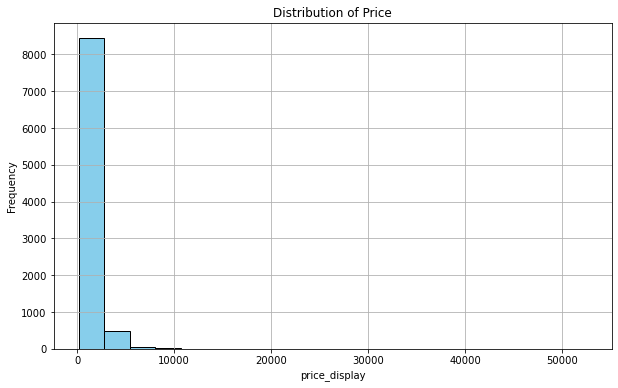

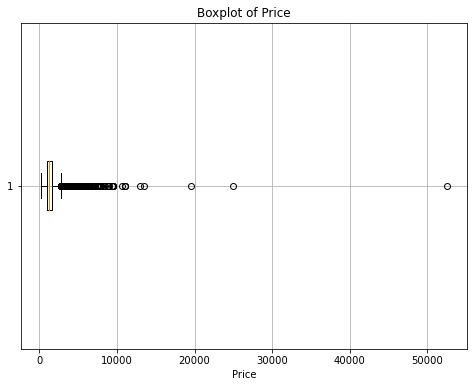

In [68]:
import matplotlib.pyplot as plt

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['price_display'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Price')
plt.xlabel('price_display')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['price_display'], vert=False)
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.grid(True)
plt.show()

In [69]:

# Assuming 'data' is your dataset and 'column_name' is the name of the column you want to Winsorize
lower_percentile = 1  # Set the lower percentile (e.g., 1st percentile)
upper_percentile = 99  # Set the upper percentile (e.g., 99th percentile)

lower_threshold = np.percentile(df['price_display'], lower_percentile)
upper_threshold = np.percentile(df['price_display'], upper_percentile)

# Apply Winsorization
df['price_display']= np.where(df['price_display'] < lower_threshold, lower_threshold, df['price_display'])
df['price_display'] = np.where(df['price_display'] > upper_threshold, upper_threshold, df['price_display'])




In [70]:

bins = [0, 950.000000, 1695.000000 , float('inf')]
labels = ['Low', 'Mid', 'High']

df['price_category'] = pd.cut(df['price_display'], bins=bins, labels=labels, right=False)


In [71]:
df["price_display"].describe()

count    8993.000000
mean     1461.675058
std       781.792995
min       529.920000
25%       950.000000
50%      1275.000000
75%      1695.000000
max      4995.000000
Name: price_display, dtype: float64

#### there is alot of states and cities but what we need is feature to indicate if this city offers a high or a low price 
#### note if our test data in aanother folder we need to  merge city_price_group column with test data based on city column

## feature extraction 

<AxesSubplot:>

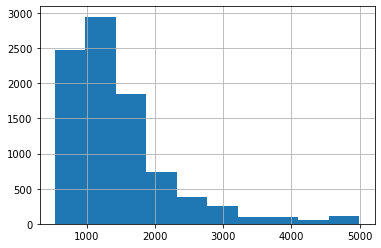

In [72]:
df["price_display"].hist()

In [73]:
df["price_display"].info()

<class 'pandas.core.series.Series'>
Int64Index: 8993 entries, 0 to 8999
Series name: price_display
Non-Null Count  Dtype  
--------------  -----  
8993 non-null   float64
dtypes: float64(1)
memory usage: 140.5 KB


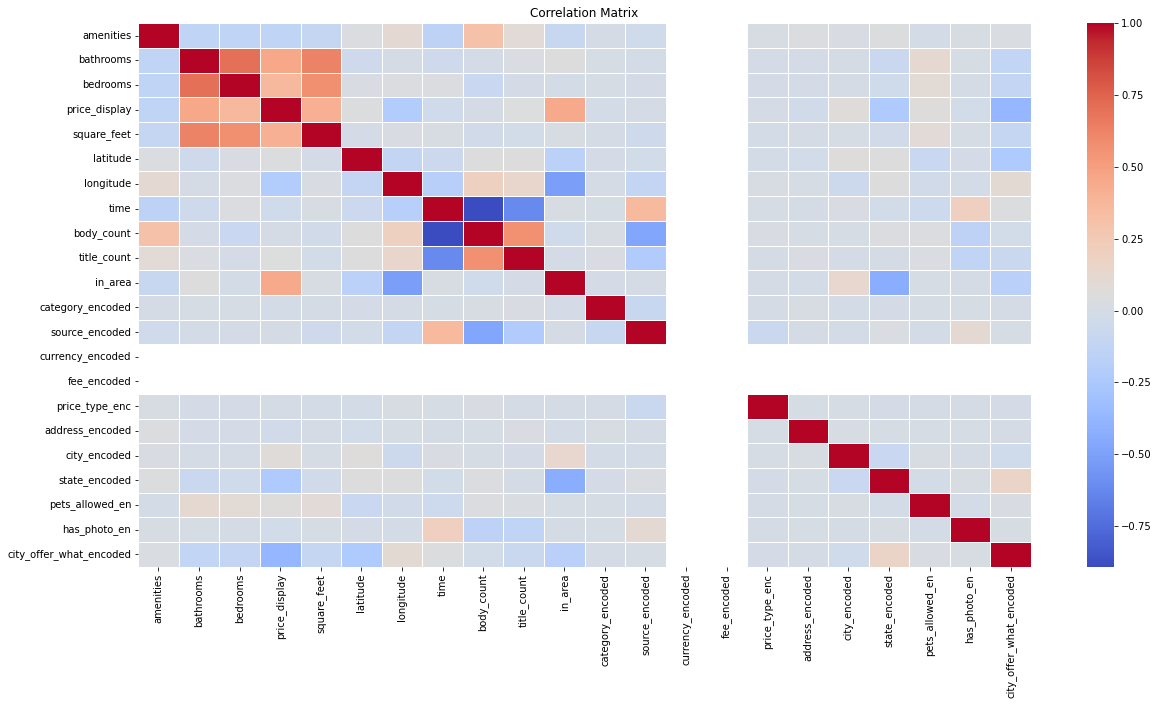

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# If you have missing values, you might want to handle them first

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix using seaborn without annotation
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [75]:
df.corr()["price_display"].sort_values()

city_offer_what_encoded   -0.370625
state_encoded             -0.230566
longitude                 -0.216661
amenities                 -0.133914
time                      -0.039198
address_encoded           -0.028321
has_photo_en              -0.026856
category_encoded          -0.018319
price_type_enc            -0.004435
source_encoded            -0.003680
body_count                -0.002739
latitude                   0.040482
title_count                0.048552
pets_allowed_en            0.063325
city_encoded               0.073409
bedrooms                   0.364425
square_feet                0.412532
in_area                    0.451387
bathrooms                  0.454402
price_display              1.000000
currency_encoded                NaN
fee_encoded                     NaN
Name: price_display, dtype: float64

In [76]:
useless_columns = ["time","currency_encoded",
                   "fee_encoded","price_type_enc","address_encoded","source_encoded"
                  ,"price_type_enc","body_count",
                    "category_encoded"
                  ,"pets_allowed_en","has_photo_en","title_count"
                  ,"city_encoded","price_category"]

In [77]:
d = df.drop(columns=useless_columns)

In [78]:


d.info()
X = d.drop(columns=['price_display'])  # Features
y = d['price_display']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8993 entries, 0 to 8999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   amenities                8993 non-null   int32  
 1   bathrooms                8993 non-null   float64
 2   bedrooms                 8993 non-null   float64
 3   price_display            8993 non-null   float64
 4   square_feet              8993 non-null   int64  
 5   latitude                 8993 non-null   float64
 6   longitude                8993 non-null   float64
 7   in_area                  8993 non-null   int64  
 8   state_encoded            8993 non-null   int32  
 9   city_offer_what_encoded  8993 non-null   int32  
dtypes: float64(5), int32(3), int64(2)
memory usage: 667.4 KB


In [79]:
X.columns

Index(['amenities', 'bathrooms', 'bedrooms', 'square_feet', 'latitude',
       'longitude', 'in_area', 'state_encoded', 'city_offer_what_encoded'],
      dtype='object')

In [80]:
degree = 2 # You can change the degree of the polynomial
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [81]:
X_train_poly.shape

(7194, 55)

In [82]:
model = LinearRegression()
model_lin = LinearRegression()
model_rid = Ridge(alpha=1.0)
model_des = DecisionTreeRegressor(max_depth=8)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42 )

cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5)

model.fit(X_train_poly, y_train)
model_lin.fit(X_train,y_train)
model_rid.fit(X_train,y_train)
model_des.fit(X_train,y_train)


rf_regressor.fit(X_train, y_train)


y_pred = model.predict(X_test_poly)
y_pred_lin = model_lin.predict(X_test)
y_pred_re = model_rid.predict(X_test)
y_pre_des = model_des.predict(X_test)

y_pred_Random_forest = rf_regressor.predict(X_test)

In [83]:
cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5) 
print("Cross-validated Scores:", cv_scores)

Cross-validated Scores: [0.75220073 0.74304597 0.75719979 0.79277321 0.74798211]


In [84]:

# Evaluating the model performance
mse_test = mean_squared_error(y_test, y_pred)
mse_test_lin = mean_squared_error(y_test, y_pred_lin)
mse_test_rid = mean_squared_error(y_test, y_pred_re)
mse_test_des = mean_squared_error(y_test, y_pre_des)
mse_test_Rand = mean_squared_error(y_test, y_pred_Random_forest)

print("Mean Squared Error on test set polynomia;:", mse_test)
print("Mean Squared Error on test set linear:", mse_test_lin)
print("Mean Squared Error on test set line ridge:", mse_test_rid)
print("Mean Squared Error on test set line desision tree:", mse_test_des)
print("Mean Squared Error on test set line Random_forest:", mse_test_Rand)

print("r2_score random forest for :", r2_score(y_test, y_pred_Random_forest))


Mean Squared Error on test set polynomia;: 179775.7076979727
Mean Squared Error on test set linear: 318405.37681969884
Mean Squared Error on test set line ridge: 318403.7932572818
Mean Squared Error on test set line desision tree: 165012.32912890424
Mean Squared Error on test set line Random_forest: 117742.52490748388
r2_score random forest for : 0.812284331064423


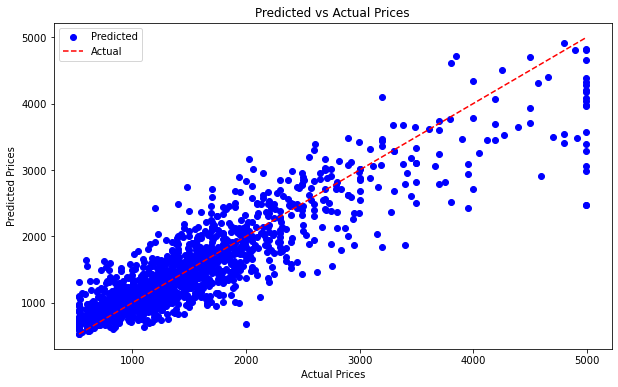

In [85]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot for predicted vs actual prices
plt.scatter(y_test, y_pred_Random_forest, color='blue', label='Predicted')

# Plotting the line of equality
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')

# Labels and title
plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()

# Show plot
plt.show()
